<a href="https://colab.research.google.com/github/Harsh-248/Security_Data_Wrangling/blob/main/Security_Data_Wrangling_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: You are the cybersecurity expert of a company. In the last month, some cybersecurity events with different durations and patterns have been registered

1) Most targeted Destination IP addresses
2) Most logical ports attacked
3) Most Frequently/common type of attack
4) Different time of the day, hours, or night
5) Find the pattern

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipaddress
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [94]:
 df = pd.read_csv('Cybersecurity_attacks.csv')
df.shape

(178031, 11)

In [95]:
df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [96]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


Now, We're splitting the time column by start and last time

In [97]:
df[['Start time','Last time']] = df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [98]:
df['.'].unique()

array(['.'], dtype=object)

In [99]:
df = df.drop(['.','Time'],axis=1) #Drop columns and make a copy in memory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [100]:
df.shape

(178031, 11)

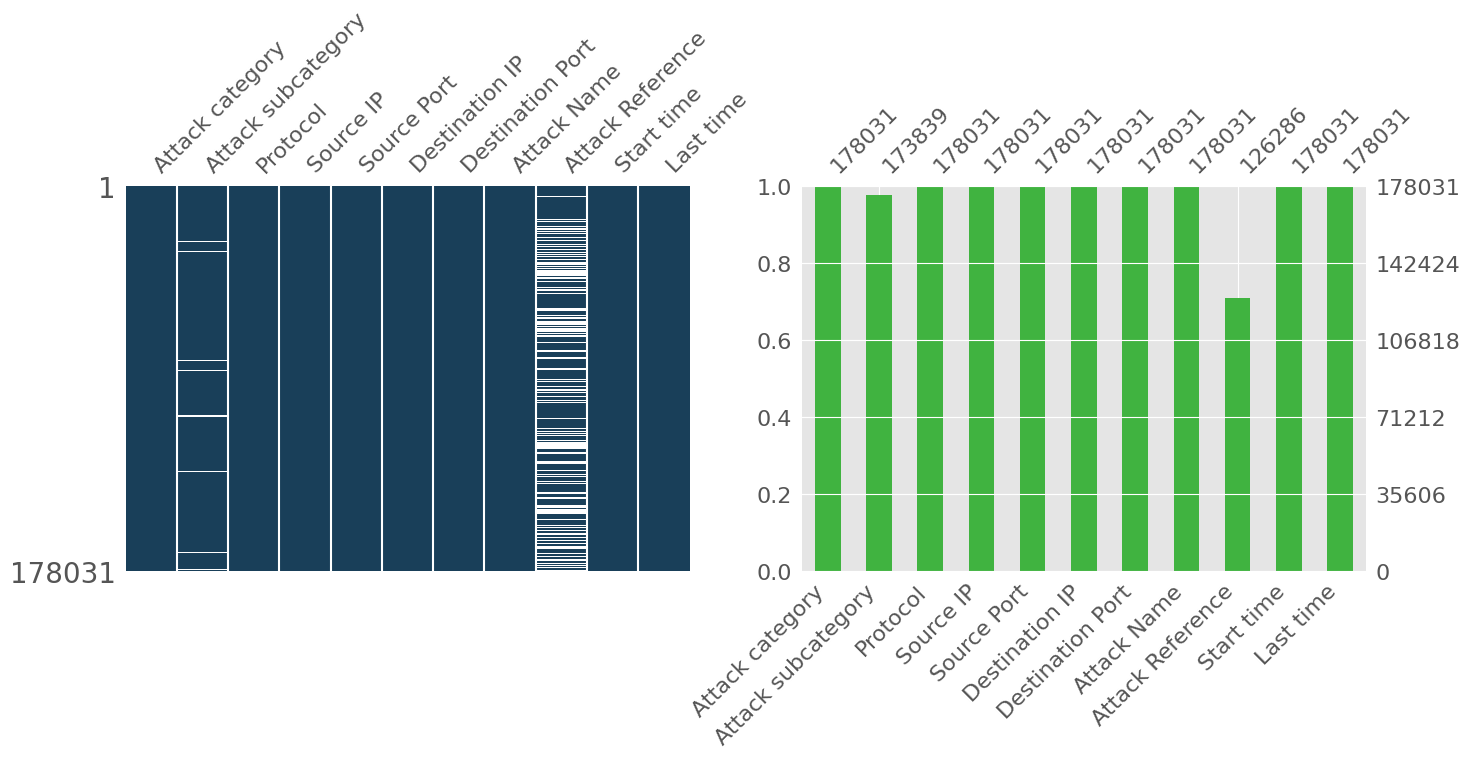

In [101]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [102]:
df["Attack subcategory"] = df["Attack subcategory"].fillna("Not registered")
df.isnull().sum()

,0
Attack category,0
Attack subcategory,0
Protocol,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Attack Name,0
Attack Reference,51745
Start time,0


In [103]:
df[pd.isnull(df).any(axis = 1)].shape

(51745, 11)

In [104]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
32881,Exploits,Browser,ospf,175.45.176.1,0,149.171.126.16,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424223999,1424224029
40645,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.13,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424227562,1424227593
61710,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424231161,1424231205
115911,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424246344,1424246344
122923,Exploits,Browser,sep,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
148693,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424256448,1424256450


In [105]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [106]:
df = df[-(invalid_SP | invalid_DP)].reset_index(drop=True)
df.shape

(174347, 11)

In [107]:
print('Total number of different protocol:' , len(df['Protocol'].unique()))
print('Total number of different Attack categories:' , len(df['Attack category'].unique()))
df['Protocol'].unique()

Total number of different protocol: 131
Total number of different Attack categories: 14


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [108]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [109]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOORS')
df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418
...,...,...,...,...,...,...,...,...,...,...,...
174342,DOS,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,1424262066,1424262069
174343,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262067,1424262068
174344,RECONNAISSANCE,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,NaN,1424262067,1424262068
174345,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424262068,1424262068


In [110]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))


Total number of different protocols: 129
Total number of different Attack categories: 10


In [111]:
df[pd.isnull(df['Attack Reference'])][:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
258,FUZZERS,OSPF,OSPF,175.45.176.3,0,149.171.126.14,0,"Fuzzer: OSPF Hello Packet: Invalid Length, Lon...",NaN,1421927643,1421927645
500,FUZZERS,BGP,TCP,175.45.176.2,63685,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927755
501,FUZZERS,BGP,TCP,175.45.176.2,48413,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927756
502,FUZZERS,BGP,TCP,175.45.176.2,30451,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756
503,FUZZERS,BGP,TCP,175.45.176.2,58077,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756


In [112]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

Attack category
FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: count, dtype: int64


In [113]:
print(df['Attack category'].value_counts())

Attack category
EXPLOITS          68217
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4097
ANALYSIS           1881
SHELLCODE          1511
BACKDOORS           256
WORMS               169
Name: count, dtype: int64


In [114]:
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

,count
Attack category,
RECONNAISSANCE,90.132102
FUZZERS,88.141388
ANALYSIS,85.964912
SHELLCODE,49.437459
WORMS,6.508876
GENERIC,1.717019
BACKDOOR,1.610935
DOS,0.215605
EXPLOITS,0.007330


In [115]:
tcp_ports =  pd.read_csv('TCP-ports.csv')
tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head(10)

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry
5,7,ECHO,Echo
6,9,DISCARD,Discard
7,11,SYSTAT,Active Users
8,13,DAYTIME,Daytime
9,15,NaN,Unassigned [was netstat]


In [116]:
print("Dimensions before merging dataframes: " , (df.shape))
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port',how='left')
newdf = newdf.rename(columns={'Service':'Destination Service'})

print("Dimensions after merging dataframes: " + str(newdf.shape))

Dimensions before merging dataframes:  (174347, 11)
Dimensions after merging dataframes: (174347, 13)


In [117]:
newdf = newdf.drop(columns=['Port'])
newdf.head()


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP


In [118]:
newdf['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOORS', 'ANALYSIS', 'BACKDOOR'],
      dtype=object)

In [119]:
newdf['Attack category'].value_counts()

,count
Attack category,
EXPLOITS,68217
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4097
ANALYSIS,1881
SHELLCODE,1511
BACKDOORS,256


In [120]:
newdf['Attack category'].value_counts()*100/newdf["Attack category"].value_counts().sum()

,count
Attack category,
EXPLOITS,39.127143
FUZZERS,19.293707
DOS,14.099468
RECONNAISSANCE,11.549381
GENERIC,11.391076
BACKDOOR,2.349911
ANALYSIS,1.078883
SHELLCODE,0.866662
BACKDOORS,0.146834


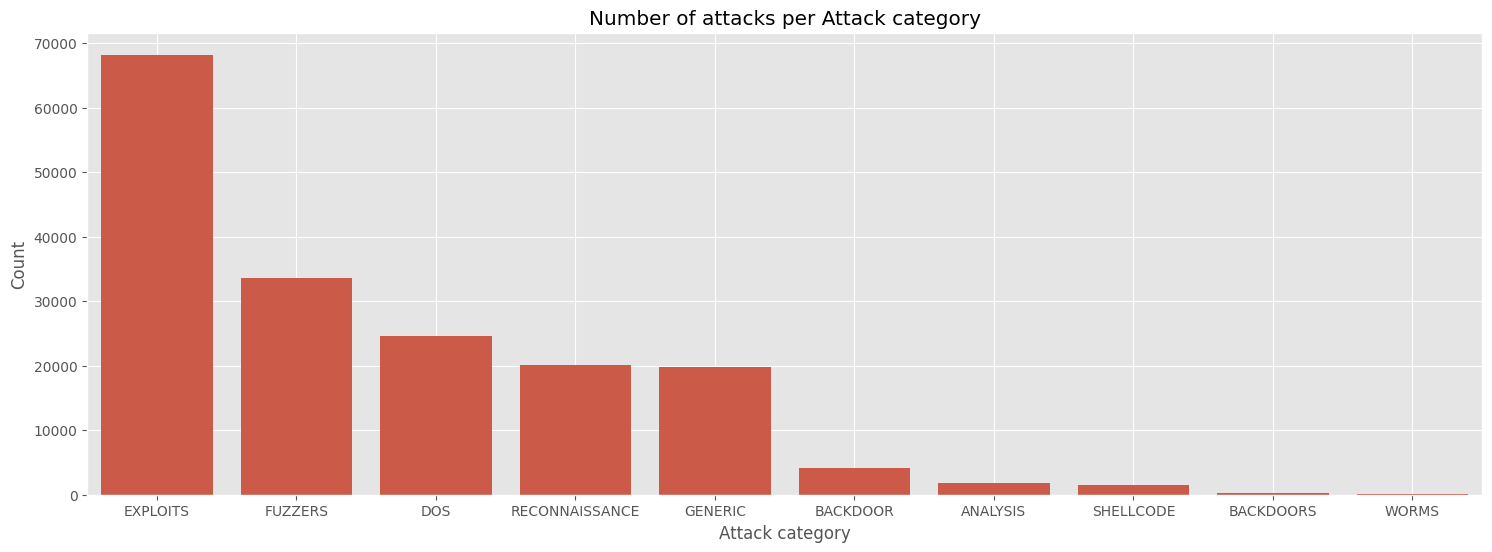

In [121]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts().values)
plt.xlabel('Attack category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack category')
plt.grid(True)

In [122]:
pd.DataFrame(newdf['Attack category'].value_counts())[:5]

,count
Attack category,
EXPLOITS,68217
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860


In [123]:
a=pd.DataFrame(newdf['Attack category'].value_counts())[:5]

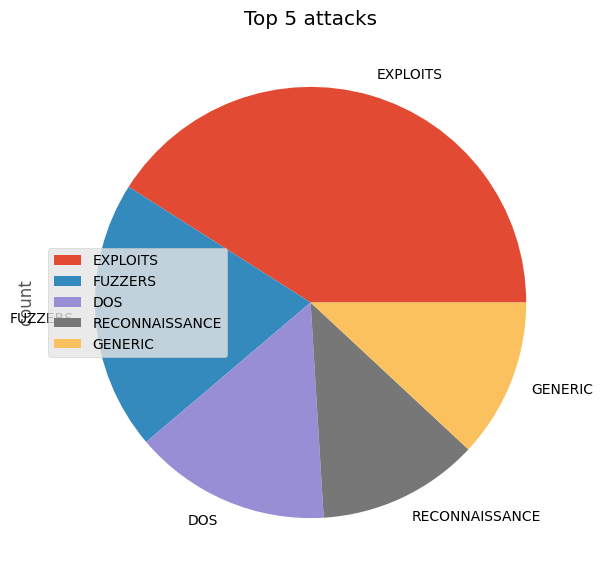

In [124]:
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top 5 attacks')
plt.legend(loc='center left')
plt.show()

**NOW TO ANALYSE Attacks With Date and Time**

In [125]:
newdf['Start time']

,Start time
0,1421927414
1,1421927415
2,1421927416
3,1421927417
4,1421927418
...,...
174342,1424262066
174343,1424262067
174344,1424262067
174345,1424262068


In [126]:
newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.total_seconds()
                     .fillna(0)  # Replace NaN with 0
                     .astype(int))  # Convert to integer



In [127]:
newdf[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0


In [128]:
newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

In [129]:
newdf.describe()

,Source Port,Destination Port,Start time,Last time,Duration
count,174347.000000,174347.000000,174347,174347,174347.000000
mean,15390.600710,1304.554526,2015-02-16 00:10:52.937515264,2015-02-16 00:10:55.279620864,2.342105
min,0.000000,0.000000,2015-01-22 11:50:14,2015-01-22 11:50:15,0.000000
25%,0.000000,0.000000,2015-02-18 03:07:25,2015-02-18 03:07:28,0.000000
50%,0.000000,0.000000,2015-02-18 05:32:24,2015-02-18 05:32:24,0.000000
75%,31855.500000,80.000000,2015-02-18 09:27:04,2015-02-18 09:27:04,1.000000
max,65535.000000,65535.000000,2015-02-18 12:21:08,2015-02-18 12:21:09,60.000000
std,21707.638236,7465.911059,NaN,NaN,9.310248


Mean and 75% is very different for SourcePort and Destination Port is very different. However minimum and maximum is same. Here comes the Hypothesis testing

H0 : U1 = u2
H1 : U1 != u2

In [130]:
statistic, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)
print ('p-value in T-test: ' + str(pvalue))

p-value in T-test: 0.0


In [131]:
newdf.select_dtypes(include=['number']).corr(method='pearson')


,Source Port,Destination Port,Duration
Source Port,1.000000,0.137158,-0.078055
Destination Port,0.137158,1.000000,-0.026777
Duration,-0.078055,-0.026777,1.000000


In [132]:
newdf.select_dtypes(include=['number']).corr(method='spearman')


,Source Port,Destination Port,Duration
Source Port,1.000000,0.885338,0.360957
Destination Port,0.885338,1.000000,0.346855
Duration,0.360957,0.346855,1.000000


In [133]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])


In [134]:
corr_matrix = df_dummies.select_dtypes(include=['number']).corr(method='pearson')


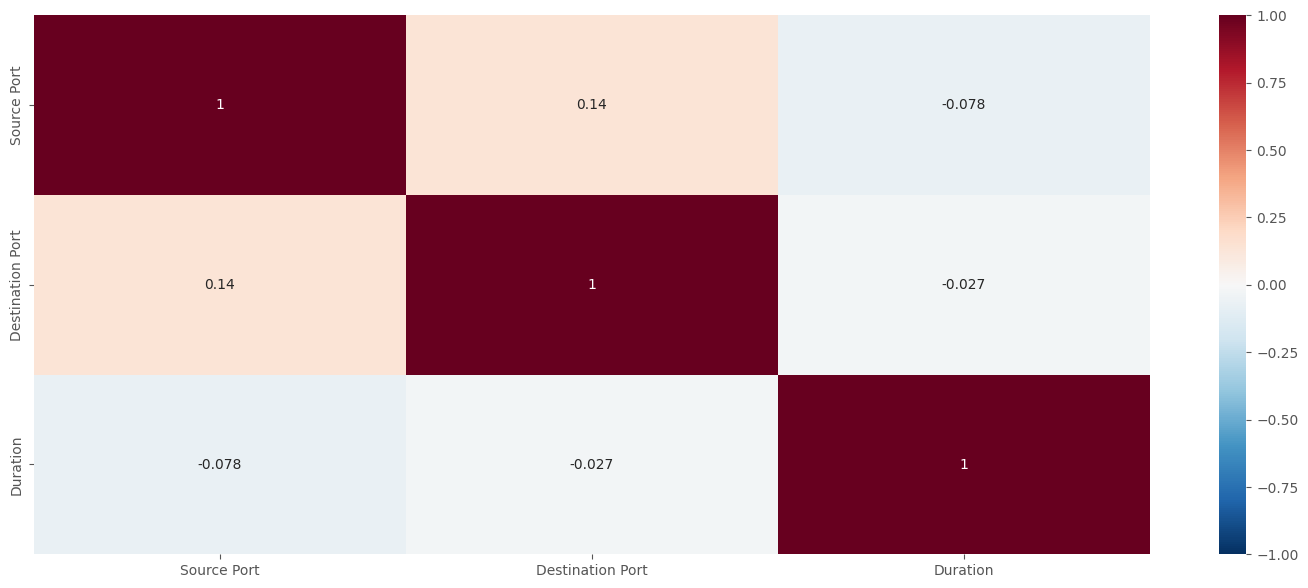

In [135]:
plt.figure(figsize=(18,7))
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, cmap=sns.color_palette("RdBu_r", as_cmap=True))
plt.show()


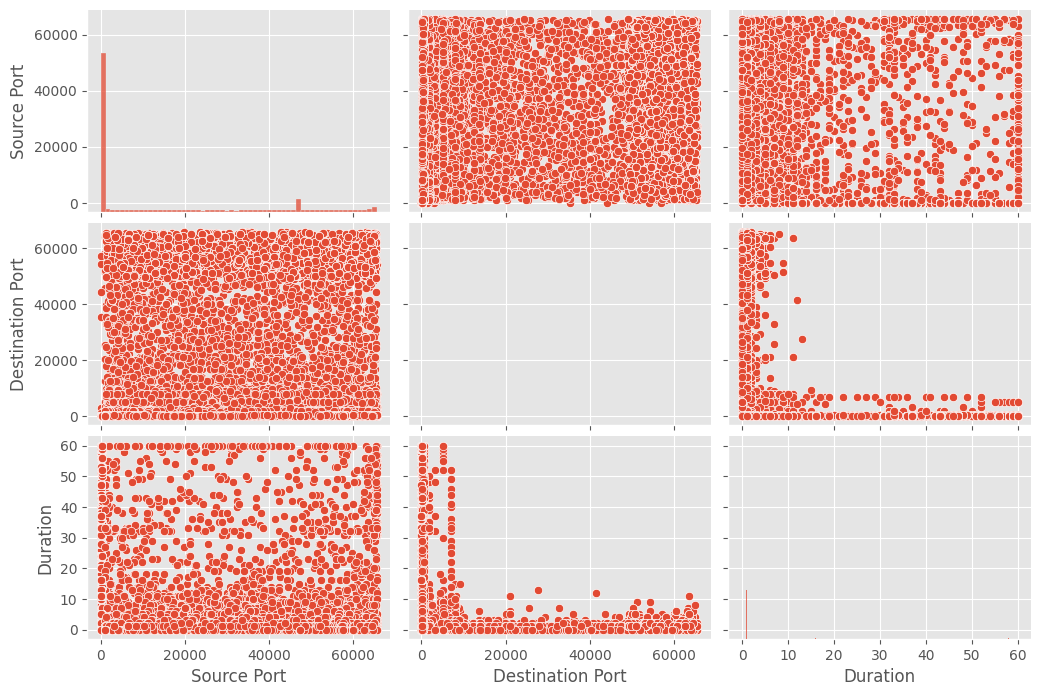

In [136]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11, 7)
plt.show()

In [137]:
newdf['Destination IP'].value_counts()

,count
Destination IP,
149.171.126.17,43199
149.171.126.10,24002
149.171.126.19,21619
149.171.126.13,20465
149.171.126.18,13305
149.171.126.14,12195
149.171.126.12,11970
149.171.126.15,10555
149.171.126.11,9444


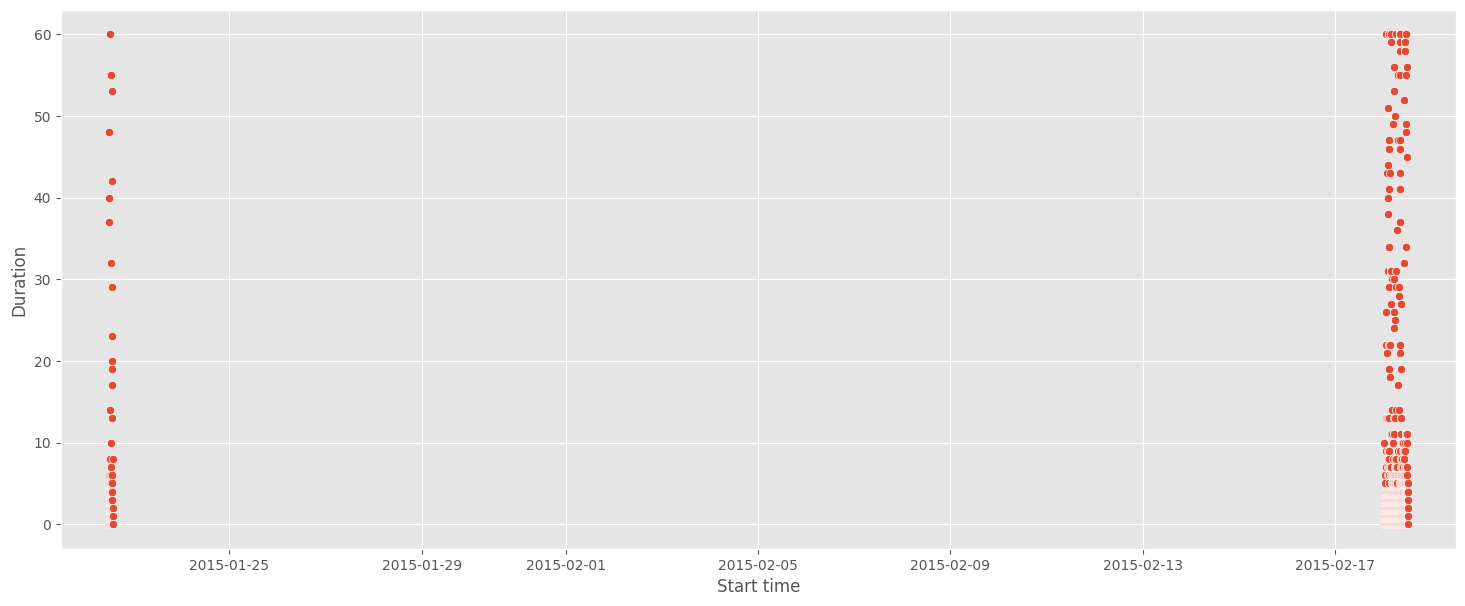

In [138]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Duration'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

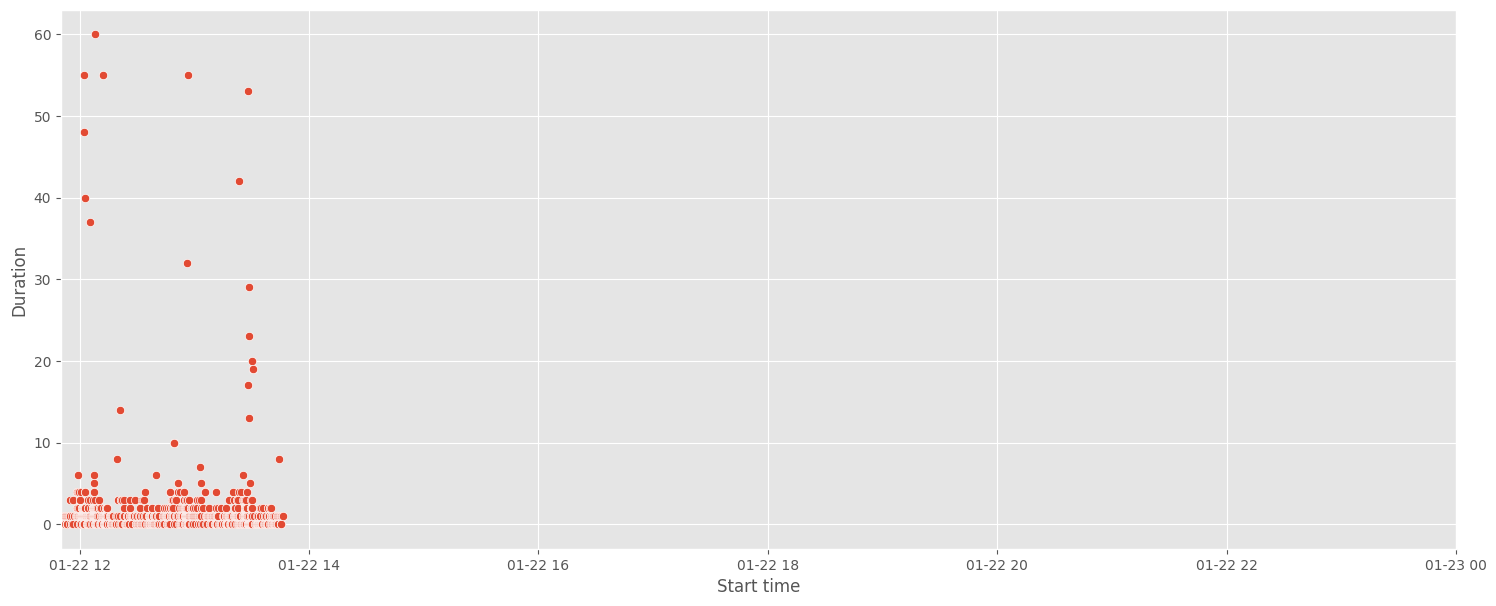

In [139]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Duration'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))

plt.grid(True)
plt.show()

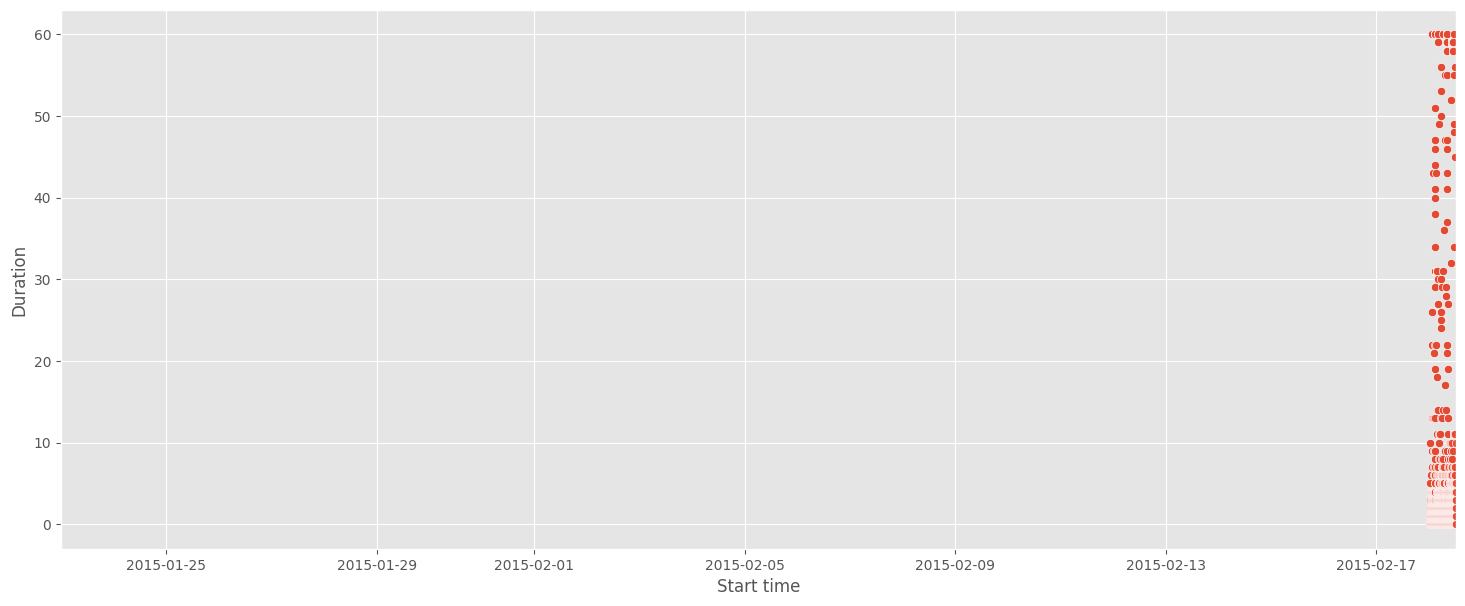

In [140]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP'] == '149.171.126.17']['Start time'],
                y=newdf[newdf['Destination IP'] == '149.171.126.17']['Duration'])
plt.xlim(left=datetime.strptime('15-01-23', '%y-%m-%d'),right=newdf['Start time'].max())

plt.grid(True)
plt.show()

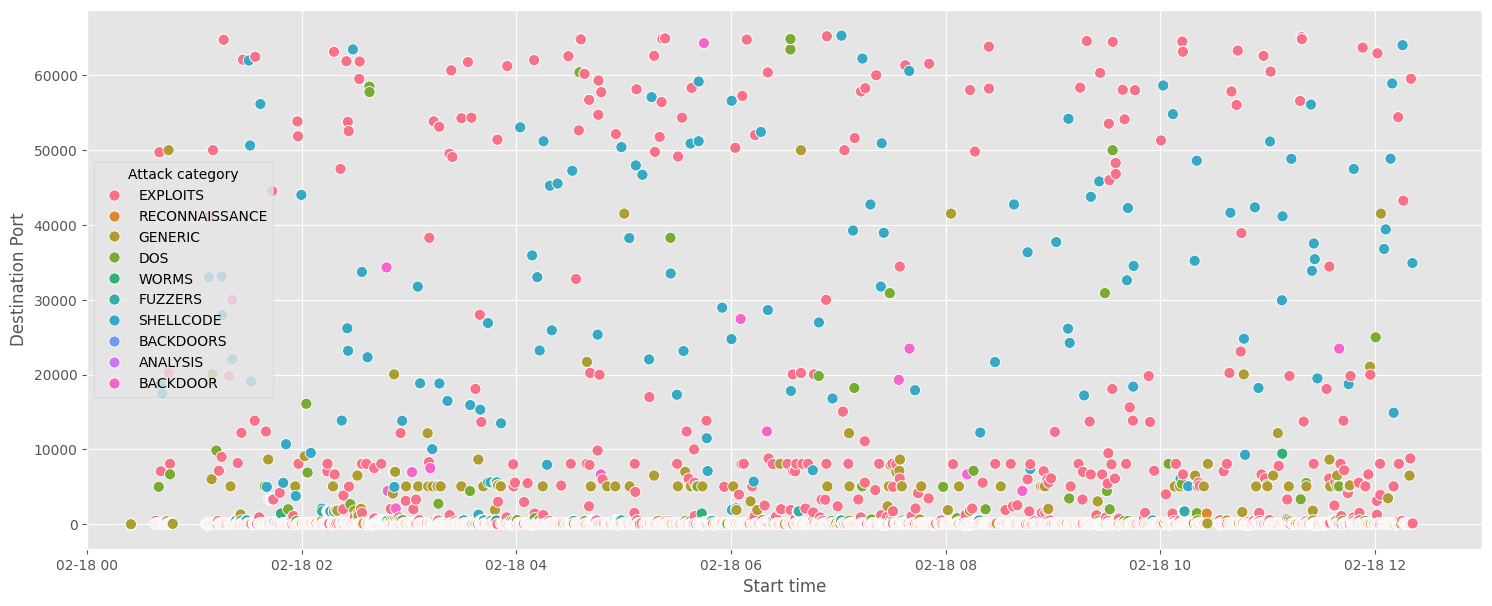

In [141]:

newdf['Start time'] = pd.to_datetime(newdf['Start time'])
filtered_df = newdf[newdf['Destination IP'] == '149.171.126.17']

plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', data=filtered_df, s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))

plt.grid(True)
plt.show()

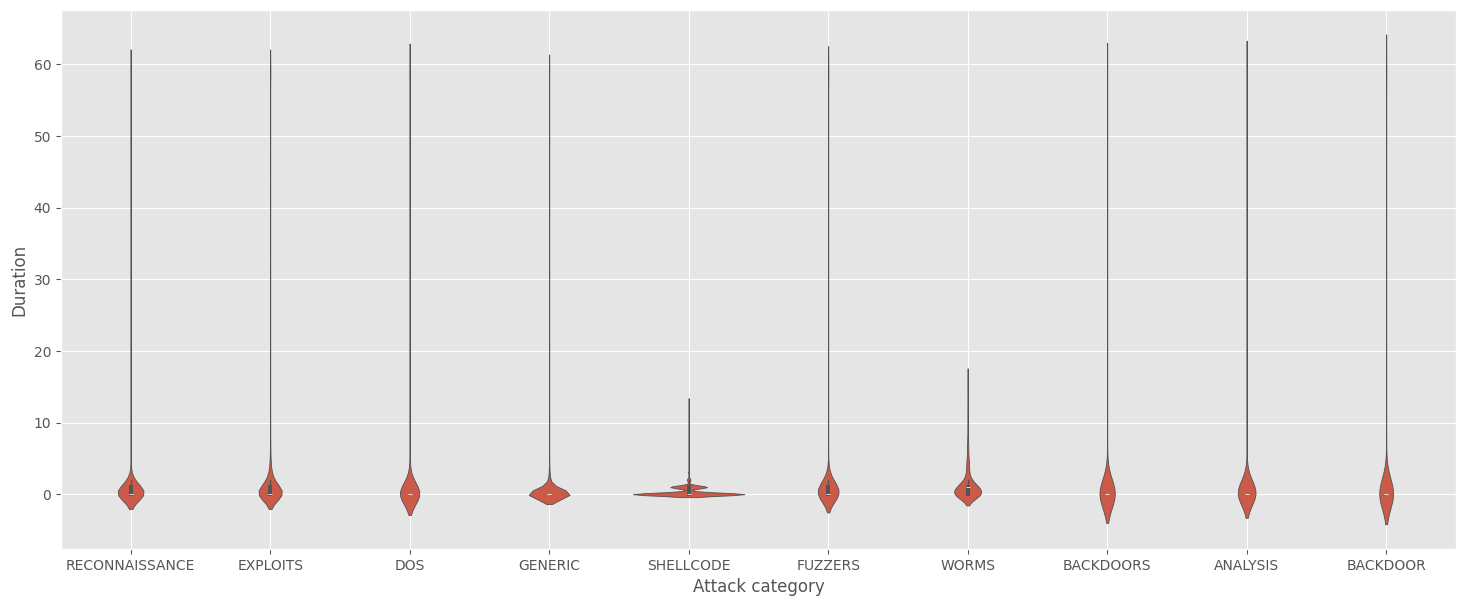

In [142]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category', y='Duration', data=newdf)
plt.grid(True)
plt.show()

In [143]:
def hatemap_grade(df, xlabel, ylabel, title):
  plt.figure(figsize=(18,8))
  ax = sns.heatmap(df)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xtricks(rotation=90)
  plt.ytricks(rotation=90)
  plt.show()


In [144]:
newdf["Start time"]

,Start time
0,2015-01-22 11:50:14
1,2015-01-22 11:50:15
2,2015-01-22 11:50:16
3,2015-01-22 11:50:17
4,2015-01-22 11:50:18
...,...
174342,2015-02-18 12:21:06
174343,2015-02-18 12:21:07
174344,2015-02-18 12:21:07
174345,2015-02-18 12:21:08


In [145]:
df_pivot = newdf.copy()
df_pivot["hour"] = df_pivot.apply(lambda row: '0'*(2-len(str(row["Start time"].hour))) + str(row["Start time"].hour)+':00:00', axis=1)

In [146]:
df_pivot[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service,Duration,hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0,11:00:00


In [147]:
df_pi = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_pi


Attack category,ANALYSIS,BACKDOOR,BACKDOORS,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,,
00:00:00,3.0,16.0,NaN,127.0,543.0,391.0,60.0,177.0,20.0,3.0
01:00:00,186.0,1148.0,NaN,2640.0,6717.0,4477.0,1748.0,1804.0,105.0,14.0
02:00:00,71.0,100.0,NaN,630.0,2862.0,1983.0,1031.0,1023.0,113.0,10.0
03:00:00,226.0,60.0,NaN,3755.0,9760.0,2743.0,1513.0,2727.0,113.0,17.0
04:00:00,64.0,87.0,NaN,617.0,2776.0,2090.0,1349.0,1034.0,115.0,10.0
05:00:00,198.0,645.0,NaN,3038.0,9368.0,2536.0,1834.0,1750.0,111.0,15.0
06:00:00,84.0,90.0,NaN,637.0,2968.0,2065.0,994.0,1010.0,116.0,9.0
07:00:00,179.0,578.0,NaN,3390.0,6152.0,2413.0,2076.0,1846.0,116.0,15.0
08:00:00,73.0,111.0,NaN,664.0,2939.0,2048.0,1081.0,1010.0,107.0,11.0


In [148]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()



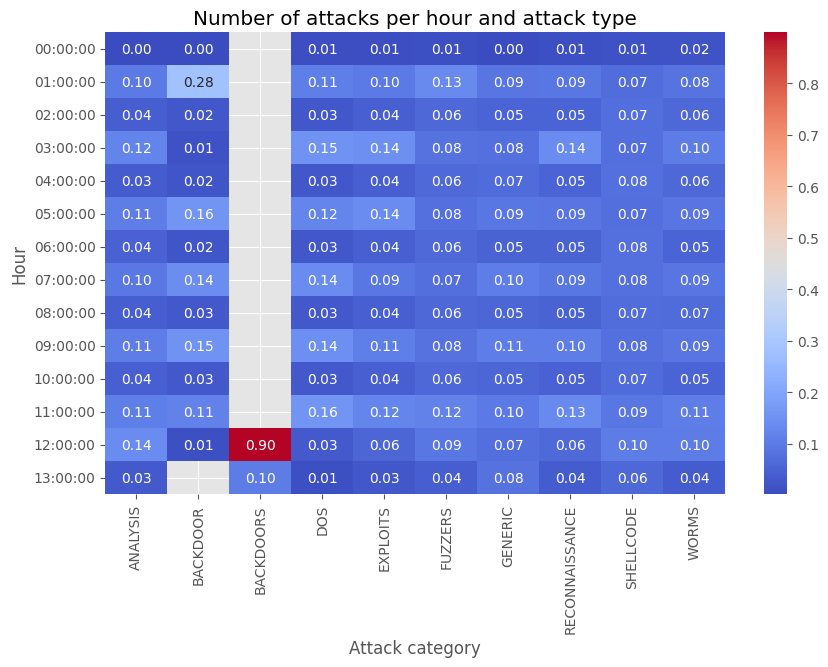

In [149]:
heatmap_graph(df = df_pi/df_pi.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

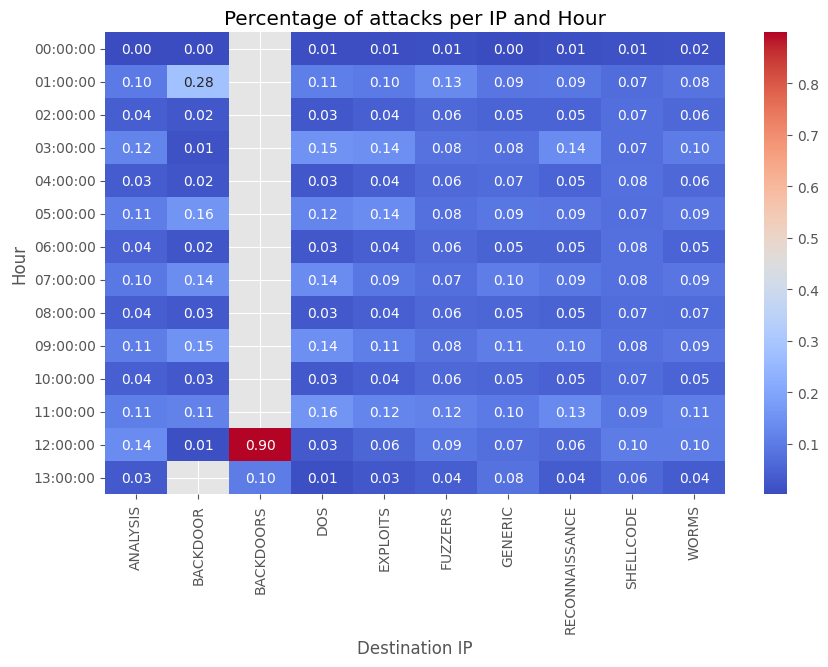

In [150]:
heatmap_graph(df = df_pi/df_pi.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Percentage of attacks per IP and Hour')

Let's now look at this same relationship per attack category performing a pair-wise T-test


In [151]:
for attack in newdf['Attack category'].unique():
    df_attack = newdf[newdf['Attack category'] == attack].copy()
    statistic, pvalue = stats.ttest_ind(df_attack['Source Port'], df_attack['Destination Port'], equal_var=False)
    print(f'p-value in T-test for {attack} attack: {pvalue}')

p-value in T-test for RECONNAISSANCE attack: 0.0
p-value in T-test for EXPLOITS attack: 0.0
p-value in T-test for DOS attack: 0.0
p-value in T-test for GENERIC attack: 0.0
p-value in T-test for SHELLCODE attack: 0.3205085348227197
p-value in T-test for FUZZERS attack: 0.0
p-value in T-test for WORMS attack: 4.246722648635902e-46
p-value in T-test for BACKDOORS attack: 0.0006073616493714767
p-value in T-test for ANALYSIS attack: 9.319524862935004e-87
p-value in T-test for BACKDOOR attack: 1.512881251373082e-14


In [152]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port,0,10,21,22,23,25,31,42,53,67,...,65455,65460,65470,65479,65486,65497,65502,65511,65517,65535
Attack category,,,,,,,,,,,,,,,,,,,,,
ANALYSIS,1442,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BACKDOOR,3790,0,6,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BACKDOORS,210,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOS,20825,4,75,0,13,425,0,0,154,33,...,0,0,0,0,0,0,0,0,0,0
EXPLOITS,40149,0,2198,14,135,4412,0,21,209,98,...,2,2,2,2,2,4,2,2,2,0
FUZZERS,13355,0,758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENERIC,2612,0,26,6,0,427,0,0,13438,54,...,0,0,0,0,0,0,0,0,0,6
RECONNAISSANCE,8324,0,0,0,7,7,0,0,41,0,...,0,0,0,0,0,0,0,0,0,0
SHELLCODE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(df_crosstab)

print(f'p-value in Chi-square test: {pvalue}')

p-value in Chi-square test: 0.0


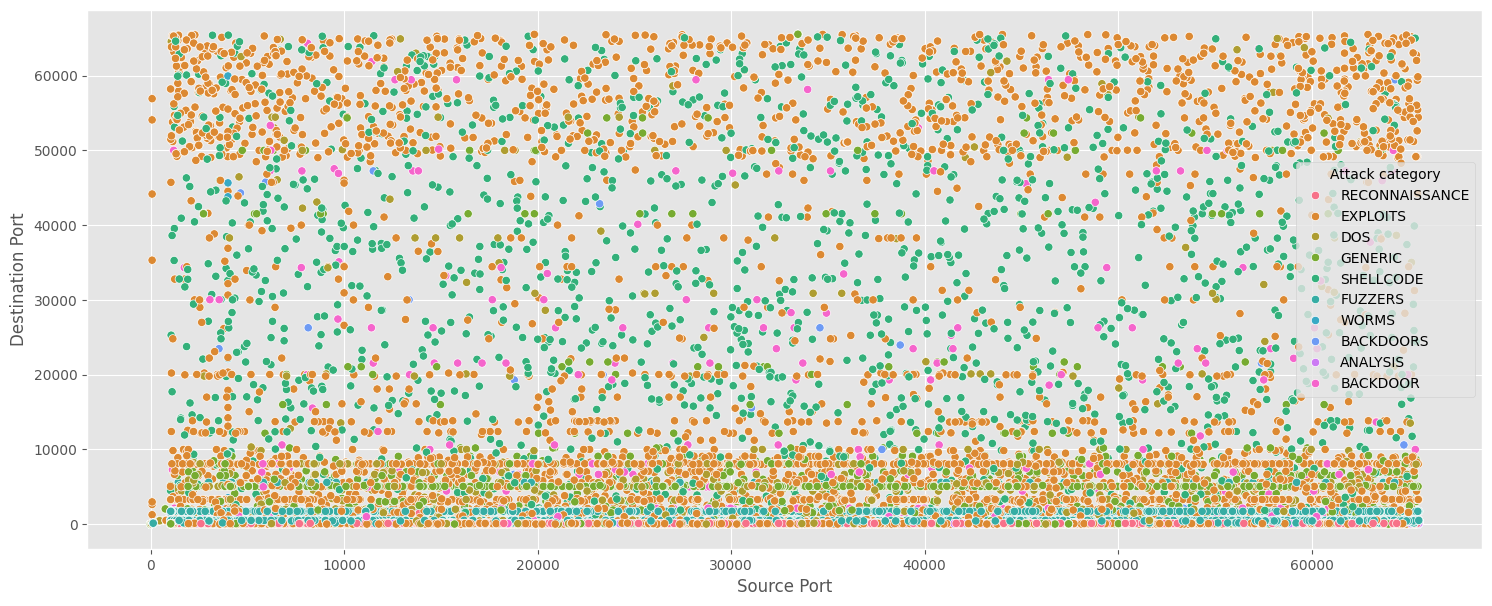

In [158]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port', y='Destination Port',hue='Attack category' ,data=newdf)
plt.show()

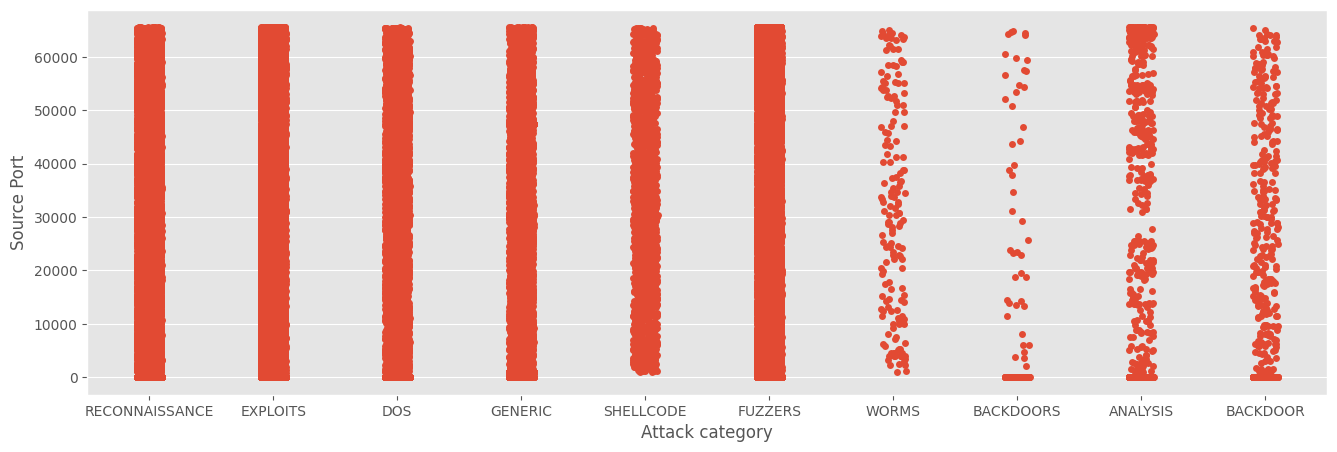

In [159]:
#SOurce ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category', y='Source Port', data=newdf)
plt.show()

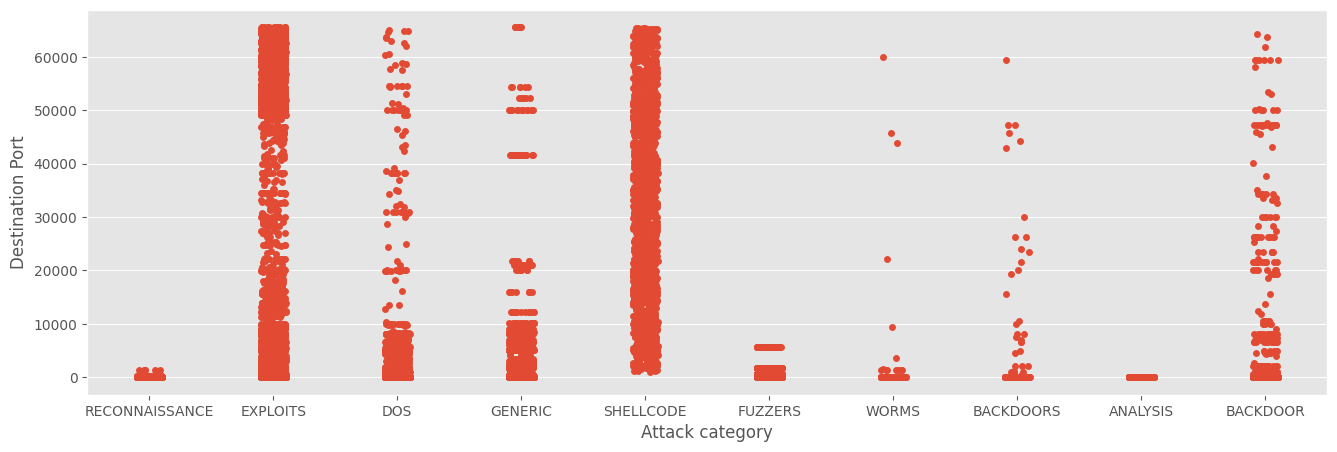

In [161]:
#Destination ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category', y='Destination Port', data=newdf)
plt.show()

In [162]:
list(newdf['Source IP'].unique())

['175.45.176.0', '175.45.176.3', '175.45.176.2', '175.45.176.1']

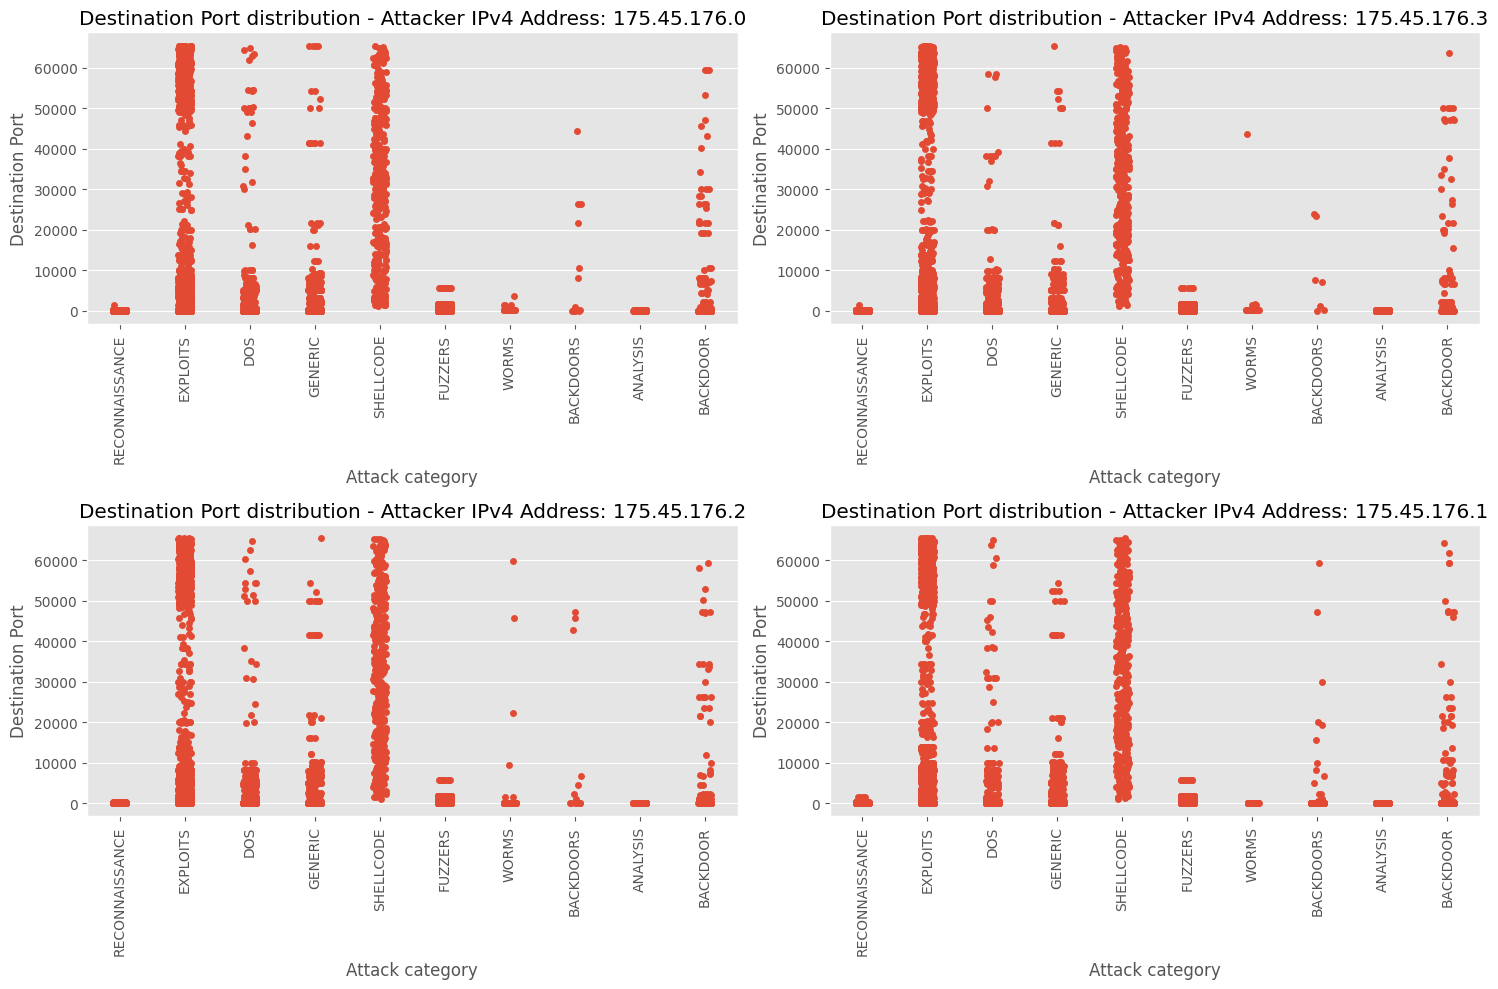

In [164]:
ips = list(newdf['Source IP'].unique())
f, axes = plt.subplots(2, 2)  # 2x2 subplots
f.set_figheight(10)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips[:4]):  # Limiting to 4 IPs to match 2x2 grid
    filtered_df = newdf[newdf['Source IP'] == ip]  # Correct filtering
    sns.stripplot(x='Attack category', y='Destination Port', data=filtered_df, order=labels, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel('Attack category')
    axes[i // 2, i % 2].set_ylabel('Destination Port')
    axes[i // 2, i % 2].set_title(f"Destination Port distribution - Attacker IPv4 Address: {ip}")
    axes[i // 2, i % 2].set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()

In [165]:
list(newdf['Destination IP'].unique())

['149.171.126.16',
 '149.171.126.18',
 '149.171.126.10',
 '149.171.126.15',
 '149.171.126.14',
 '149.171.126.12',
 '149.171.126.13',
 '149.171.126.11',
 '149.171.126.17',
 '149.171.126.19']

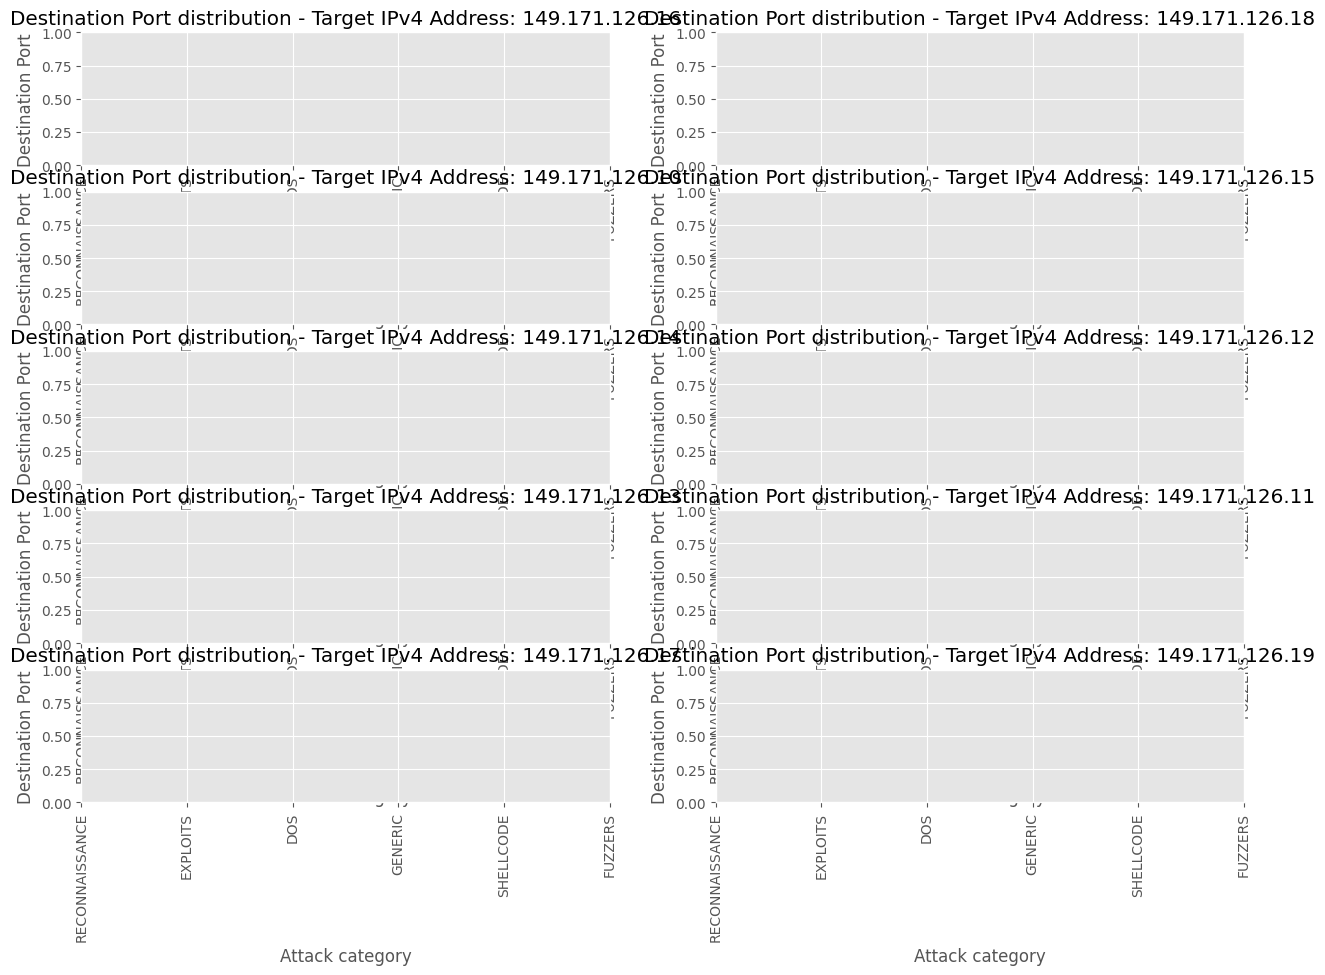

In [169]:
ips = list(newdf['Destination IP'].unique())
f, axes = plt.subplots(5, 2)  # 2x2 subplots
f.set_figheight(10)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips):  # Limiting to 4 IPs to match 2x2 grid
    filtered_df = newdf[newdf['Source IP'] == ip]  # Correct filtering
    sns.stripplot(x='Attack category', y='Destination Port', data=filtered_df, order=labels, ax=axes)
    axes[i // 2, i % 2].set_xlabel('Attack category')
    axes[i // 2, i % 2].set_ylabel('Destination Port')
    axes[i // 2, i % 2].set_title(f"Destination Port distribution - Target IPv4 Address: {ip}")
    axes[i // 2, i % 2].set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()
